In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
#from anndata import AnnData
import scipy
#from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), 'Documents/git/Xct'))

    from scTenifoldXct.main import *
    import scTenifoldXct.dNN as dNN    
    import scTenifoldXct.visualization as vis
    
except ImportError:
    print('Module not found')

In [3]:
ada = sc.read_h5ad("data/uterus_processed.h5ad")
ada

AnnData object with n_obs × n_vars = 12115 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Percent_mito', 'RNA_snn_res.0.1', 'seurat_clusters', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'log1p', 'raw'

In [4]:
ada_WT = sc.read_h5ad("data/uterus_processed_WT.h5ad")
#ada_KO = ada[ada.obs['orig.ident'] == 'ACD+/-', :].copy()
ada_KO = ada[ada.obs['orig.ident'] == 'WTA11', :].copy()

ada_WT.shape, ada_KO.shape

((2177, 3000), (3451, 3000))

In [5]:
# sc.pp.subsample(ada_WT, n_obs = 2177, random_state=0, copy = False)
# ada_WT.write('./data/uterus_processed_WT.h5ad')

ada_WT.obs['ident'].value_counts()

stromal cells        737
myocytes             631
epithelial cells     508
endothelial cells    133
pericytes             85
lymphocytes           46
mesothelial cells     22
myeloid cells         15
Name: ident, dtype: int64

In [6]:
ada_KO.obs['ident'].value_counts()

stromal cells        1089
myocytes              945
epithelial cells      910
endothelial cells     245
pericytes             136
lymphocytes            77
myeloid cells          41
mesothelial cells       8
Name: ident, dtype: int64

## WT vs KO:

In [7]:
# obj1 = Xct(ada_WT, 'stromal cells', 'epithelial cells', build_GRN = True, save_GRN = True, 
#           pcNet_name = 'Net_Stro2Epi_WT', mode = 'full', verbose=True)

obj1 = Xct(ada_WT, 'stromal cells', 'epithelial cells', specis='Mouse', build_GRN = False,
           pcNet_name = 'Net_Stro2Epi_WT', mode = 'full', verbose=True)

print(obj1)

init an Xct object for interactions from stromal cells (737) to epithelial cells (508)...
loading GRNs...
building correspondence...
init completed.
Xct object for interactions from stromal cells (737) to epithelial cells (508)
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [8]:
obj1._specis

'Mouse'

In [9]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,Igf1,Ntrk2,1.081439,0.020576,1.495801,0.031285,1.383158,1.520463,1.130928,8.596192,0.118320,-0.050668
19,Igf2,Ntrk2,0.760958,0.020576,1.124664,0.031285,1.477958,1.520463,1.393640,8.596192,0.058786,-0.050668
30,Pdgfa,Ntrk2,0.048685,0.020576,0.087633,0.031285,1.799980,1.520463,6.080437,8.596192,-0.046643,-0.050668
32,Fgf1,Ntrk2,0.002687,0.020576,0.005315,0.031285,1.977776,1.520463,27.129320,8.596192,-0.039716,-0.050668
35,Fgf7,Ntrk2,0.037522,0.020576,0.067222,0.031285,1.791539,1.520463,6.909876,8.596192,-0.001346,-0.050668
...,...,...,...,...,...,...,...,...,...,...,...,...
7907,Lama4,Prnp,0.286792,0.545182,0.489649,0.703650,1.707328,1.290671,2.439915,1.538640,0.032563,0.030632
7911,Lama3,Prnp,0.002147,0.545182,0.003392,0.703650,1.580019,1.290671,27.129320,1.538640,-0.039716,0.030632
7914,Lamb3,Prnp,0.017418,0.545182,0.032935,0.703650,1.890810,1.290671,10.418896,1.538640,0.006679,0.030632
7915,Lama2,Prnp,0.354710,0.545182,0.554975,0.703650,1.564588,1.290671,2.100213,1.538640,0.013862,0.030632


In [10]:
# obj2 = Xct(ada_KO, 'stromal cells', 'epithelial cells', build_GRN = True, save_GRN = True, 
#           pcNet_name = 'Net_Stro2Epi_WTA11', mode = 'full', verbose=True)


obj2 = Xct(ada_KO, 'stromal cells', 'epithelial cells', specis='Mouse', build_GRN = False,
           pcNet_name = 'Net_Stro2Epi_WTA11', mode = 'full', verbose=True)

print(obj2)

init an Xct object for interactions from stromal cells (1089) to epithelial cells (910)...
loading GRNs...
building correspondence...
init completed.
Xct object for interactions from stromal cells (1089) to epithelial cells (910)
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [11]:
df2 = obj2.fill_metric()
df2

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,Igf1,Ntrk2,0.905582,0.024714,1.383298,0.040887,1.527524,1.654408,1.298764,8.181862,0.145188,0.046233
19,Igf2,Ntrk2,0.513536,0.024714,0.809025,0.040887,1.575399,1.654408,1.751498,8.181862,0.041671,0.046233
30,Pdgfa,Ntrk2,0.035513,0.024714,0.070595,0.040887,1.987863,1.654408,7.481677,8.181862,-0.035990,0.046233
32,Fgf1,Ntrk2,0.004584,0.024714,0.005748,0.040887,1.253721,1.654408,16.537082,8.181862,-0.031458,0.046233
35,Fgf7,Ntrk2,0.028851,0.024714,0.050583,0.040887,1.753215,1.654408,7.795333,8.181862,-0.014925,0.046233
...,...,...,...,...,...,...,...,...,...,...,...,...
7915,Lama2,Prnp,0.215258,0.701311,0.347459,0.734031,1.614149,1.046655,2.738369,1.221649,-0.008104,0.009252
7969,Dpp4,Ada,0.017984,0.106122,0.036970,0.133007,2.055758,1.253340,10.691713,3.436624,-0.033153,-0.007533
7981,Sftpd,Lair1,0.004491,0.005637,0.007374,0.009767,1.641819,1.732686,19.119750,17.532057,-0.031176,-0.041292
8008,Alcam,Chl1,0.093171,0.000826,0.180782,0.000620,1.940315,0.750802,4.563469,30.149627,0.029244,-0.040559


In [12]:
#selected LR pairs
candidates1 = get_candidates(df1)
print(len(candidates1))

candidates2 = get_candidates(df2)
print(len(candidates2))

385
512


In [13]:
candidates_union = list(set(candidates1).union(set(candidates2)))
len(candidates_union)

520

In [14]:
candidates_inter = list(set(candidates1).intersection(set(candidates2)))
len(candidates_inter)

377

#### single object:

1:

In [15]:
counts_np1 = get_counts_np(obj1)
len(counts_np1), counts_np1[0].shape, counts_np1[1].shape

(2, (3000, 737), (3000, 508))

In [16]:
projections1, losses1 = dNN.train_and_project(counts_np1, obj1._w, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=737, out_features=152, bias=True)
  (linear2): Linear(in_features=152, out_features=38, bias=True)
  (linear3): Linear(in_features=38, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=508, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
1 5020.5107421875
100 884.8057250976562
200 849.9647827148438
300 850.8693237304688
400 848.3668823242188
500 848.3430786132812
600 848.017333984375
700 848.0882568359375
800 848.143310546875
900 848.0172119140625
1000 847.9152221679688


In [17]:
df_nn1 = nn_aligned_dist(obj1, projections1)
df_nn1

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
mt-Rnr1_Ptn,"(2921, 2048)",0.000002,1,4.454391e+01
Gm7729_Ybx1,"(1303, 1930)",0.000002,2,6.095829e+01
Cygb_Shfm1,"(2056, 2558)",0.000002,3,5.915681e+01
Id3_Tmsb4x,"(2397, 2444)",0.000003,4,8.014101e+01
Hmgn2_1810037I17Rik,"(405, 643)",0.000003,5,5.985119e+01
...,...,...,...,...
Cmah_St6gal2,"(1407, 21)",0.032659,8999996,9.409825e-48
Cmah_Serpina3g,"(1407, 36)",0.032659,8999997,9.409825e-48
Cmah_Srrm4,"(1407, 37)",0.032659,8999998,9.409825e-48
Cmah_Fam78a,"(1407, 153)",0.032659,8999999,9.409825e-48


In [18]:
df_enriched1 = chi2_test(df_nn1, df = 3, pval = 0.05, FDR = True, candidates = candidates1)

df_enriched1


Total enriched: 9 / 9000000


,idx,dist,rank,correspondence_score,q_val,enriched_rank
Anxa2_Plat,"(1423, 2711)",0.000665,21808,73.679848,0.002158,1
Lama2_Rpsa,"(703, 1003)",0.000973,32136,48.027979,0.004594,2
Igf1_Fgfr2,"(2411, 969)",0.001456,48866,26.961390,0.010101,3
Ptn_Ncl,"(2048, 1756)",0.001866,63186,295.721522,0.016442,4
Igf2_Fgfr2,"(2080, 969)",0.002003,67989,17.571088,0.018901,5
Tgfb2_Plat,"(1408, 2711)",0.002012,68320,21.406035,0.019077,6
Wnt16_Fzd10,"(2442, 2271)",0.003001,106040,16.103748,0.040653,7
Ybx1_Notch1,"(1930, 308)",0.003245,116418,15.224370,0.046803,8
Igf1_Epha4,"(2411, 1728)",0.003339,120425,15.788986,0.049269,9


2:

In [19]:
counts_np2 = get_counts_np(obj2)
len(counts_np2), counts_np2[0].shape, counts_np2[1].shape

(2, (3000, 1089), (3000, 910))

In [20]:
projections2, losses2 = dNN.train_and_project(counts_np2, obj2._w, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=1089, out_features=184, bias=True)
  (linear2): Linear(in_features=184, out_features=46, bias=True)
  (linear3): Linear(in_features=46, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=910, out_features=168, bias=True)
  (linear2): Linear(in_features=168, out_features=42, bias=True)
  (linear3): Linear(in_features=42, out_features=2, bias=True)
)
1 5984.0341796875
100 931.0325317382812
200 844.928955078125
300 834.010986328125
400 831.72021484375
500 831.0784301757812
600 830.8660278320312
700 830.7144165039062
800 830.6367797851562
900 830.548828125
1000 830.6332397460938


In [21]:
df_nn2 = nn_aligned_dist(obj2, projections2)
df_nn2

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
Gm7676_Rpl7,"(2810, 276)",0.000004,1,1.124619e+02
Sod1_Ncl,"(592, 1756)",0.000007,2,1.063884e+02
Cd9_Ifitm1,"(2456, 2882)",0.000007,3,9.891934e+01
Sod1_H3f3b,"(592, 1815)",0.000007,4,1.065735e+02
Mgp_Hist1h2an,"(2608, 2955)",0.000008,5,8.540313e+01
...,...,...,...,...
Msln_Cryaa,"(2833, 2412)",0.032274,8999996,9.659328e-48
A430104N18Rik_1700102P08Rik,"(902, 97)",0.032274,8999997,9.659328e-48
Msln_Cd19,"(2833, 2409)",0.032274,8999998,9.659328e-48
Msln_Pou3f3,"(2833, 2260)",0.032274,8999999,9.659328e-48


In [22]:
df_enriched2 = chi2_test(df_nn2, df = 3, pval = 0.05, FDR = True, candidates = candidates2)

df_enriched2


Total enriched: 5 / 9000000


,idx,dist,rank,correspondence_score,q_val,enriched_rank
Anxa2_Plat,"(1423, 2711)",0.000421,11189,45.354787,0.001059,1
Ptn_Ncl,"(2048, 1756)",0.001164,31077,201.341592,0.008062,2
Tgfb2_Plat,"(1408, 2711)",0.001638,43882,26.248027,0.015884,3
Igf1_Fgfr2,"(2411, 969)",0.002266,61812,20.797237,0.029834,4
Wnt16_Fzd10,"(2442, 2271)",0.002905,82048,15.904248,0.047256,5


#### merged object:

In [23]:
obj1._w.shape, obj2._w.shape

((6000, 6000), (6000, 6000))

In [24]:
counts_np12 = get_counts_np(obj1, obj2)
len(counts_np12), counts_np12[0].shape, counts_np12[1].shape, counts_np12[2].shape, counts_np12[3].shape

(4, (3000, 737), (3000, 508), (3000, 1089), (3000, 910))

In [25]:
W = build_W(obj1, obj2)
W.shape

(12000, 12000)

In [26]:
projections12, losses12 = dNN.train_and_project(counts_np12, w = W, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=737, out_features=152, bias=True)
  (linear2): Linear(in_features=152, out_features=38, bias=True)
  (linear3): Linear(in_features=38, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=508, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=1089, out_features=184, bias=True)
  (linear2): Linear(in_features=184, out_features=46, bias=True)
  (linear3): Linear(in_features=46, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=910, out_features=168, bias=True)
  (linear2): Linear(in_features=168, out_features=42, bias=True)
  (linear3): Linear(in_features=42, out_features=2, bias=True)
)
1 8893.7119140625
100 873.3534545898438
200 852.3301391601562
300 855.66162109375
400 848.1394653320312
500 848.0004272460938
600 846.8861083984375
700 846.6257934570312
800 847.1016235351562
900

In [27]:
projections12.shape

(12000, 2)

In [28]:
projections_split = np.array_split(projections12, 2) #return a list of ndarray
projections_split[0].shape, projections_split[1].shape

((6000, 2), (6000, 2))

In [29]:
df_nn1 = nn_aligned_dist(obj1, projections_split[0])
df_nn2 = nn_aligned_dist(obj2, projections_split[1])

df_nn1.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...
computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
Hbb-bs_Spint2,"(2998, 2477)",6.747425e-07,1,33.865308
Sfrp2_Stc1,"(1533, 2422)",1.074796e-06,2,41.486907
Hand2_Hist1h2ao,"(1593, 2984)",1.442741e-06,3,41.906703
Wfdc1_Gng5,"(211, 1690)",1.667083e-06,4,37.505247
mt-Rnr1_Hnrnpab,"(2921, 1363)",1.786017e-06,5,38.670904


In [30]:
df_nn_all = nn_aligned_dist_diff(df_nn1, df_nn2)

df_nn_all

,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff2,diff2_rank
Gdpd3_Isg15,"(1326, 2337)",0.011084,1504128,1.215552e+00,"(1326, 2337)",0.018752,5031058,4.520014e-03,5.879164e-05,1
Lef1_Isg15,"(1132, 2337)",0.012361,2184903,8.093412e-01,"(1132, 2337)",0.019865,5553196,2.180019e-03,5.631329e-05,2
Gdpd3_Iigp1,"(1326, 2437)",0.008835,833303,2.235624e+00,"(1326, 2437)",0.016228,3857083,1.367844e-02,5.464872e-05,3
Slitrk6_Isg15,"(588, 2337)",0.013041,2553150,5.928152e-01,"(588, 2337)",0.020349,5805555,1.727849e-03,5.340958e-05,4
Vit_Isg15,"(958, 2337)",0.008190,730515,2.294237e+00,"(958, 2337)",0.015437,3457426,1.408704e-02,5.253016e-05,5
...,...,...,...,...,...,...,...,...,...,...
Pecam1_Cd19,"(2748, 2409)",0.019962,5824705,3.323460e-03,"(2748, 2409)",0.019962,5606552,6.128091e-25,3.469447e-18,8999996
Meg3_Gm10259,"(1642, 2787)",0.004865,332853,6.120026e+00,"(1642, 2787)",0.004865,252736,9.581857e+00,8.673617e-19,8999997
Smim22_Sycp2l,"(2452, 1454)",0.021269,6541232,2.964459e-25,"(2452, 1454)",0.021269,6306439,2.319343e-03,0.000000e+00,8999998
Ccdc150_Sox18,"(150, 1796)",0.022481,8033657,4.343759e-26,"(150, 1796)",0.022481,7464106,2.110045e-04,0.000000e+00,8999999


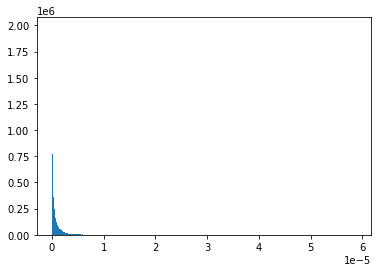

In [31]:
plt.hist(df_nn_all['diff2'], bins=1000)
plt.show()

In [47]:
df_enriched_diff = chi2_diff_test(df_nn_all, df=1, FDR=False, candidates=candidates_union)
df_enriched_diff


Total enriched: 41 / 9000000


,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff2,diff2_rank,p_val,enriched_rank
Cxcl12_Dpp4,"(2926, 2152)",0.002931,169064,8.047994e+00,"(2926, 2152)",0.005911,350533,1.925137e+00,0.000009,51161,0.000749,1
Cxcl12_Cxcr4,"(2926, 423)",0.007265,602863,1.961482e+00,"(2926, 423)",0.010205,989865,4.107437e-01,0.000009,54417,0.000879,2
Clec11a_Kit,"(668, 762)",0.017423,4658950,6.655918e-02,"(668, 762)",0.020337,5798800,3.753100e-03,0.000008,56705,0.000977,3
Angpt1_Kit,"(1309, 762)",0.011417,1666195,4.725700e-01,"(1309, 762)",0.014309,2874391,3.496306e-02,0.000008,58708,0.001067,4
Cxcl12_Itga4,"(2926, 2064)",0.011013,1471179,1.741462e-01,"(2926, 2064)",0.013878,2645923,4.742562e-03,0.000008,61241,0.001189,5
Cxcl12_Ackr3,"(2926, 711)",0.010655,1334612,3.043388e-01,"(2926, 711)",0.013481,2444661,3.190535e-02,0.000008,65632,0.001388,6
Lama2_Itga6,"(703, 2278)",0.003938,248095,5.289654e+00,"(703, 2278)",0.006666,430920,1.423466e+00,0.000007,78423,0.002023,7
Igf2_Kit,"(2080, 762)",0.008432,767522,2.015190e+00,"(2080, 762)",0.011051,1258416,1.473576e-01,0.000007,95671,0.003053,8
Inhba_Bambi,"(1616, 258)",0.007662,655551,1.457130e+00,"(1616, 258)",0.010234,997197,4.129489e-01,0.000007,104116,0.003608,9
Adm_Ramp3,"(733, 2033)",0.017842,4836279,5.396184e-03,"(733, 2033)",0.015305,3389439,6.661059e-02,0.000006,111299,0.004093,10


#### GSEA:

In [48]:
genelist = get_genelist(df_enriched_diff, saveas='DA_result_genes')
len(genelist)

49

In [49]:
genelist

['Ccr2',
 'Cxcr5',
 'Clec11a',
 'Robo2',
 'Bdnf',
 'Vcan',
 'Cxcr4',
 'Nrp1',
 'Gpr20',
 'Fgf1',
 'Adm',
 'Ramp2',
 'Itga4',
 'Ackr3',
 'Fgf9',
 'Cxcr6',
 'Bambi',
 'Ramp1',
 'Lamb3',
 'Igf1',
 'Inhba',
 'Dpp4',
 'Alcam',
 'Fzd6',
 'Angpt1',
 'Kit',
 'Lama4',
 'Ccr1',
 'Aplnr',
 'Itga6',
 'Calcrl',
 'Thbs1',
 'Ccr5',
 'Wnt6',
 'Sell',
 'Cx3cr1',
 'Pdgfa',
 'Apln',
 'Igf2',
 'Vtn',
 'Angpt4',
 'Cxcl12',
 'Lama2',
 'Efna5',
 'Vwf',
 'Ramp3',
 'Fgf7',
 'Slit3',
 'Ccr9']

In [50]:
import gseapy as gp

enr = gp.enrichr(gene_list= genelist,
                 gene_sets='GO_Biological_Process_2021',
                 organism='Human', 
                 outdir=None, #'enrichr_kegg',
                 no_plot=True,
                 cutoff=0.05 
                )

In [51]:
enr.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,cell chemotaxis (GO:0060326),12/69,8.647487e-20,8.612897e-17,0,0,113.194879,4968.625052,CCR1;CX3CR1;NRP1;CXCL12;KIT;CCR9;CXCR5;ACKR3;C...
1,GO_Biological_Process_2021,positive regulation of protein phosphorylation...,16/371,2.732617e-16,1.360843e-13,0,0,26.763636,959.104394,CX3CR1;ANGPT4;NRP1;RAMP3;ANGPT1;BDNF;IGF2;PDGF...
2,GO_Biological_Process_2021,second-messenger-mediated signaling (GO:0019932),9/89,8.022735e-13,2.663548e-10,0,0,55.887188,1556.532321,CCR1;CX3CR1;CCR9;CXCR5;ACKR3;CXCR4;CXCR6;CCR5;...
3,GO_Biological_Process_2021,regulation of peptidyl-tyrosine phosphorylatio...,9/92,1.090604e-12,2.715605e-10,0,0,53.859036,1483.508863,ANGPT4;NRP1;VTN;FGF7;ANGPT1;IGF2;PDGFA;IGF1;EFNA5
4,GO_Biological_Process_2021,calcitonin family receptor signaling pathway (...,5/7,1.496388e-12,2.980804e-10,0,0,1133.465909,30861.972487,RAMP2;CALCRL;RAMP3;ADM;RAMP1
5,GO_Biological_Process_2021,positive regulation of cytosolic calcium ion c...,10/147,2.171234e-12,3.604248e-10,0,0,37.084035,995.918671,CCR1;CX3CR1;CCR9;CXCR5;GPR20;ACKR3;CXCR4;CXCR6...
6,GO_Biological_Process_2021,calcium-mediated signaling (GO:0019722),9/102,2.823894e-12,4.017998e-10,0,0,48.043548,1277.617489,CCR1;CX3CR1;CCR9;CXCR5;ACKR3;CXCR4;CXCR6;CCR5;...
7,GO_Biological_Process_2021,positive regulation of protein kinase B signal...,10/161,5.407805e-12,6.732717e-10,0,0,33.622007,872.261709,CX3CR1;FGF7;RAMP3;ANGPT1;FGF9;KIT;IGF2;PDGFA;F...
8,GO_Biological_Process_2021,positive regulation of phosphorylation (GO:004...,11/253,2.035588e-11,2.252717e-09,0,0,23.575359,580.369969,NRP1;FGF7;ANGPT1;FGF9;KIT;IGF2;ITGA6;IGF1;EFNA...
9,GO_Biological_Process_2021,positive regulation of peptidyl-tyrosine phosp...,9/134,3.394638e-11,3.381060e-09,0,0,35.686800,860.274522,ANGPT4;NRP1;VTN;FGF7;ANGPT1;KIT;IGF2;IGF1;EFNA5


#### vis:

In [37]:
Xct.add_names_to_nets(obj1)
Xct.add_names_to_nets(obj2)

completed.
completed.


In [38]:
targets = vis.get_Xct_pairs(df_enriched_diff)
targets

(['Cxcl12', 'Dpp4'],
 ['Cxcl12', 'Cxcr4'],
 ['Clec11a', 'Kit'],
 ['Angpt1', 'Kit'],
 ['Cxcl12', 'Itga4'],
 ['Cxcl12', 'Ackr3'],
 ['Lama2', 'Itga6'],
 ['Igf2', 'Kit'],
 ['Inhba', 'Bambi'],
 ['Adm', 'Ramp3'],
 ['Lamb3', 'Itga6'],
 ['Thbs1', 'Itga6'],
 ['Adm', 'Gpr20'])

In [42]:
scale_factor = 10

identified 153 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

identified 153 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 42, # of edges: 40

edge from Cxcl12 to Cxcr4 added


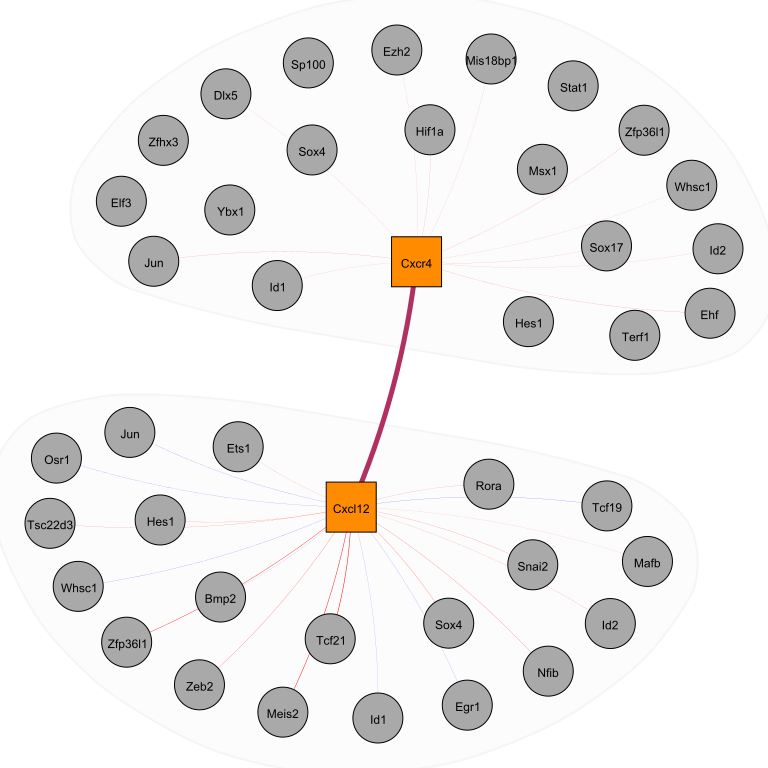

In [43]:
g1 = vis.plot_pcNet(obj1, view='sender', gene_names=[targets[1][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj1, view='receiver', gene_names=[targets[1][1]], top_edges=20, show = False, verbose = True)

vis.plot_XNet(g1, g2, Xct_pair = [targets[1]], verbose = True, edge_width_scale=scale_factor)

identified 153 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

identified 153 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 42, # of edges: 40

edge from Cxcl12 to Cxcr4 added


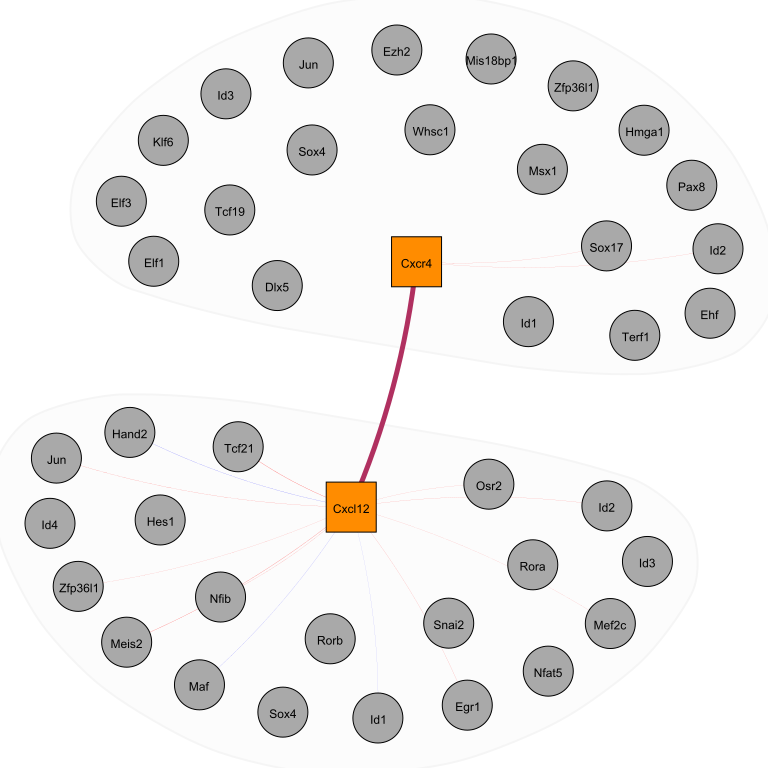

In [44]:
g1 = vis.plot_pcNet(obj2, view='sender', gene_names=[targets[1][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj2, view='receiver', gene_names=[targets[1][1]], top_edges=20, show = False, verbose = True)

vis.plot_XNet(g1, g2, Xct_pair = [targets[1]], verbose = True, edge_width_scale=scale_factor)